In [1]:
# General
import os
from datetime import date

# Py-scripts
from Classfile import *
from pre_processing import create_df
from Plotting_essentials import CMD_density_design

# PCA
from sklearn.decomposition import PCA

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
# output paths
main = "/Users/alena/Library/CloudStorage/OneDrive-Personal/Work/PhD/Isochrone_Archive/Coding/"
subdir = date.today()
output_path = os.path.join(main, str(subdir))
try:
    os.mkdir(output_path)
except FileExistsError:
    pass
output_path = output_path + "/"

# Hyperparameter path
hypers = os.path.join(output_path, "hyperparams")
try:
    os.mkdir(hypers)
except FileExistsError:
    pass
hypers = hypers + "/"
preprocess = False
## Import data catalog and preprocess it
# Catalog selection
CI_raw = "/Users/alena/PycharmProjects/PaperI/data/Cluster_data_raw/Cantat-Gaudin_Xmatch_GAIA.csv"

CI_cols = ["Cluster", "parallax_EDR3", "parallax_error_EDR3", "phot_g_mean_mag_corrected", "phot_bp_mean_mag_EDR3",
           "phot_rp_mean_mag_EDR3", "phot_g_mean_mag_error_corrected", "phot_bp_mean_mag_error",
           "phot_rp_mean_mag_error",
           "bp_rp_EDR3"]

CI_names = ["Cluster_id", "plx", "e_plx", "G_mag", "BP_mag", "RP_mag", "e_G_mag", "e_BP_mag", "e_RP_mag", "BP_RP"]

CI_clusters, CI_df = create_df(CI_raw, CI_cols, CI_names)
sns.set_style("darkgrid")

In [3]:
OC = star_cluster(CI_clusters[28], CI_df)
f = CMD_density_design([OC.CMD[:,0], OC.CMD[:,1]], title = "{0}".format(OC.name), density_plot=False)
pca = PCA(n_components=2)
pca_arr = pca.fit_transform(OC.CMD)
x_pca_density, y_pca_density, kw  = CMD_density_design([pca_arr[:, 0], pca_arr[:, 1]], title=OC.name, density_plot=False)

[-0.31734421 -0.94831042]
[-0.94831042  0.31734421]


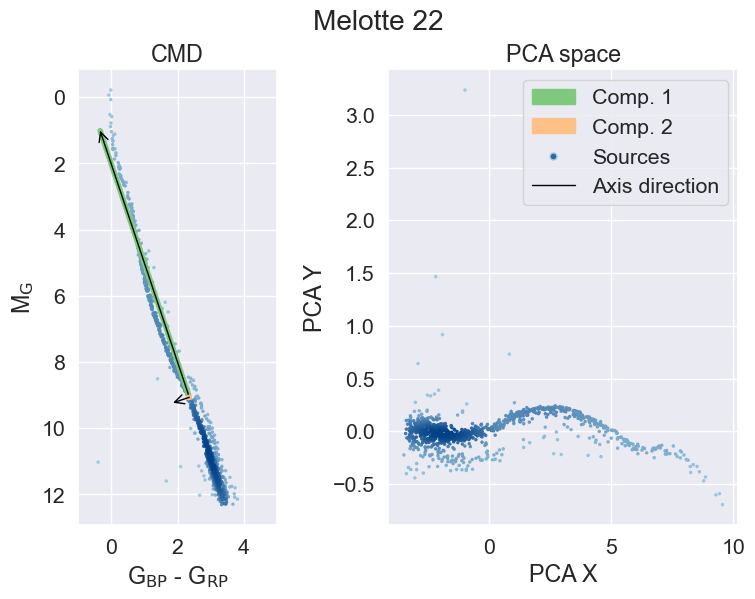

In [6]:
colors = ["#7fc97f", "#fdc086"]
labels = ["c1", "c2"]

fig, (ax, ax1) = plt.subplots(1, 2, figsize=(8, 6), gridspec_kw={'width_ratios': [1, 1]})
sns.set(font_scale=1.4)



ax = plt.subplot2grid((1, 2), (0, 0))
ax.scatter(OC.density_x, OC.density_y, **OC.kwargs_CMD)
comp_BU = [1, 15]
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    print(comp)
    comp = comp * var  # scale component by its variance explanation power
    comp_blown = comp * comp_BU[i]
        # print(comp_scaled)
    ax.annotate('', pca.mean_, pca.mean_ + comp, arrowprops=dict(arrowstyle="-", color=colors[i], linewidth=4,
                                                                     shrinkA=0, shrinkB=0))
    ax.annotate('', pca.mean_, pca.mean_ + comp_blown,
                    arrowprops=dict(arrowstyle="<-", color="black", linewidth=1,
                                    shrinkA=0, shrinkB=0))

plt.gca().set(
    aspect="equal",
)
ymin, ymax = ax.get_ylim()
ax.set_ylim(ymax, ymin)
ax.set_xlim(-1, 5)
ax.set_ylabel(r"M$_{\rm G}$")
ax.set_xlabel(r"G$_{\rm BP}$ - G$_{\rm RP}$")
ax.set_title("CMD")

ax1 = plt.subplot2grid((1, 2), (0, 1))
ax1.scatter(x_pca_density, y_pca_density, label="Sources", **kw)
ax1.set_ylabel("PCA Y")
ax1.set_xlabel("PCA X")
ax1.set_title("PCA space")
ax1.get_xlim()
ax1.get_ylim()
ax1_h, labels = ax1.get_legend_handles_labels()

legend_elements = [mpatches.Patch(color=colors[0], label='Comp. 1'),
                   mpatches.Patch(color=colors[1], label='Comp. 2'),
                   Line2D([0], [0], marker='.', color=None, lw=0, label='Sources',
                          markerfacecolor=kw["cmap"](0.7), markeredgecolor=kw["cmap"](1), markersize=10),
                   Line2D([0], [1], ls='solid', color="black", lw=1, label='Axis direction')
                   ]
ax1.legend(handles=legend_elements, loc="best")
plt.suptitle(OC.name.replace("_", " "))
plt.subplots_adjust(left=0.03, right=0.95, bottom=0.12, wspace=0.1, hspace=0.1)


plt.savefig(output_path+"{}_PCA_components.pdf".format(OC.name),dpi = 500)